In [1]:
import pandas as pd
import numpy as np

## Goals: 

### 1-) To find the most influential factors that determines the Overall quality of the beer. 
### 2-) Be able to set a recommendation pattern through exploratory analysis between factors.
### 3-) What is the breweries most prefered alcohol content (ABV). 


### Dataset source: https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate

In [2]:
df=pd.read_csv('beer_reviews.csv')

In [3]:
display(df.head())
display(df.shape)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


(1586614, 14)

### Quick summary of the dataset:
>brewery_id : Unique identification of the brewery\
>brewery_name : Name of the brewery\
>review_time : When review was made\
>review_overall : Based on all factors, the final score \
>review_aroma : Rating based on how the beer smells \
>review_appearance: Rating based on how the beer looks \
>review_profilename: Reviewer’s user ID\
>beer_style : Category of the beer\
>review_palate : Rating based on how the beer interacts with the palate \
>review_taste : Rating based on how the beer actually tastes \
>beer_name : Name of the beer\
>beer_abv : Alcohol by volume\
>beer_beerid : Unique beer identification












In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [5]:
df.isna().sum()

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

> Droping the following columns because they do not provide any relevant information to the product or the analysis.

In [6]:
df=df.drop(['index'], axis=1)
df=df.drop(['review_time'], axis=1)
#df=df.drop(['review_profilename'], axis=1)

> Changing the name of columns to more easier understanding and rearranging its order.

In [7]:
df= df.rename(columns={'review_overall':'overall','review_aroma':'aroma', 'review_palate':'palate', 'review_taste':'taste','beer_abv':'abv', 'review_appearance':'appearance', 'beer_beerid':'beer id', 'review_profilename':'user id'})

In [8]:
df.columns = df.columns.str.lower().str.replace('_', ' ')

In [9]:
df=df[['brewery id', 'brewery name', 'beer id', 'beer name', 'beer style', 'user id', 'aroma', 'appearance', 'palate', 'taste', 'abv', 'overall']]

In [10]:
df

,brewery id,brewery name,beer id,beer name,beer style,user id,aroma,appearance,palate,taste,abv,overall
0,10325,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,stcules,2.0,2.5,1.5,1.5,5.0,1.5
1,10325,Vecchio Birraio,48213,Red Moon,English Strong Ale,stcules,2.5,3.0,3.0,3.0,6.2,3.0
2,10325,Vecchio Birraio,48215,Black Horse Black Beer,Foreign / Export Stout,stcules,2.5,3.0,3.0,3.0,6.5,3.0
3,10325,Vecchio Birraio,47969,Sausa Pils,German Pilsener,stcules,3.0,3.5,2.5,3.0,5.0,3.0
4,1075,Caldera Brewing Company,64883,Cauldron DIPA,American Double / Imperial IPA,johnmichaelsen,4.5,4.0,4.0,4.5,7.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,maddogruss,4.0,3.5,4.0,4.0,5.2,5.0
1586610,14359,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,yelterdow,5.0,2.5,2.0,4.0,5.2,4.0
1586611,14359,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,TongoRad,3.5,3.0,3.5,4.0,5.2,4.5
1586612,14359,The Defiant Brewing Company,33061,The Horseman's Ale,Pumpkin Ale,dherling,4.5,4.5,4.5,4.5,5.2,4.0


> Dealing with nulls

In [11]:
df['abv'].isna().sum()

67785

In [12]:
print('The percentage of null values in abv is:', 6778500/1586614)

The percentage of null values in abv is: 4.272305677373325


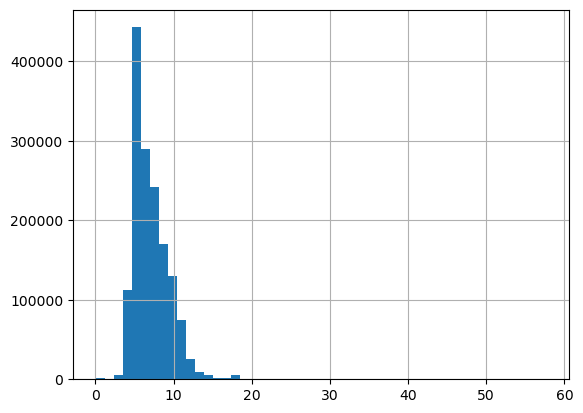

In [13]:
import matplotlib.pyplot as plt
df['abv'].hist(bins=50)

plt.show()

In [14]:
df['abv'].mean()

7.042386753208429

In [15]:
df['abv'].fillna(df['abv'].median(), inplace=True)

In [16]:
df['abv'].isna().sum()

0

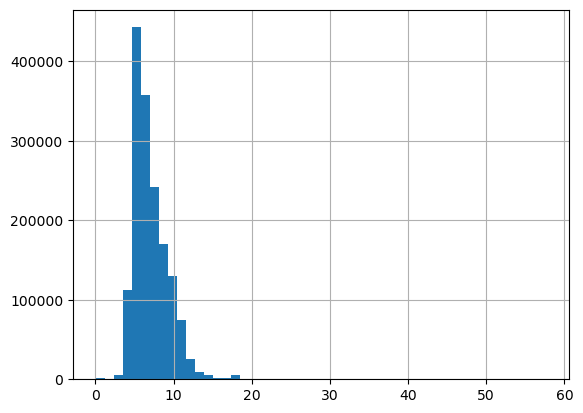

In [17]:
df['abv'].hist(bins=50)

plt.show()

#### The substitution of the null for the mean did not change the distribution  

> Nulls in brewery name are very insignificant, so we are dropping it

In [18]:
print('The percentage of null values in brewery name is:', 1500/1586614)

The percentage of null values in brewery name is: 0.0009454095325012889


In [19]:
df = df[df['brewery name'].isna() == False]

In [20]:
df.isna().sum()

brewery id        0
brewery name      0
beer id           0
beer name         0
beer style        0
user id         348
aroma             0
appearance        0
palate            0
taste             0
abv               0
overall           0
dtype: int64

In [21]:
df.shape

(1586599, 12)

> Analyzing some unique values

In [22]:
print('Unique brewery count is:', df['brewery name'].nunique())
print('Unique beer names count is:', df['beer name'].nunique())
print('Unique beer styles count is:', df['beer style'].nunique())

Unique brewery count is: 5742
Unique beer names count is: 56848
Unique beer styles count is: 104


> Ploting some grpah for better understanding of the data

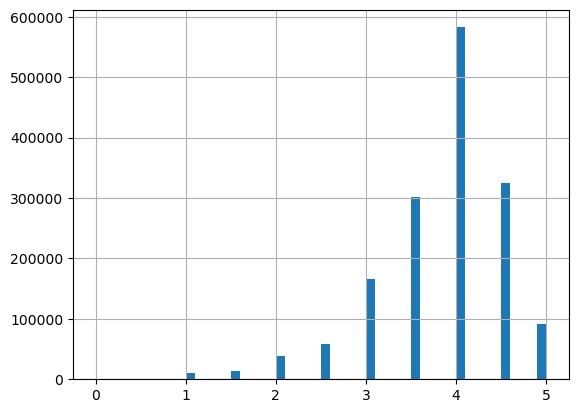

In [23]:
df['overall'].hist(bins=50)

plt.show()

In [24]:
# We first calculate the histogram counts and bins using np.histogram() function. Then, we calculate the percentage 
# by dividing each bin count by the sum of all counts and multiplying it by 100.

#counts, bins = np.histogram(df['overall'], bins=50) # 
#percentage = counts/sum(counts) * 100

# plot histogram as percentage

#plt.bar(bins[:-1], percentage, width=(bins[1]-bins[0]), align='edge')
#plt.ylabel('Percentage')
#plt.xlabel('Overall Ratings')
#plt.show()

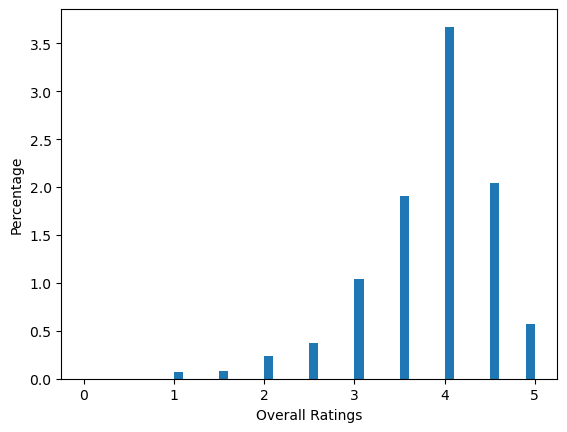

In [25]:
df.overall.plot(kind='hist', y='data', bins=50, density=True)
plt.ylabel('Percentage')
plt.xlabel('Overall Ratings')
plt.show()

##### 60% of the overall ratings are above 4 and not as many reviews 2 or below.

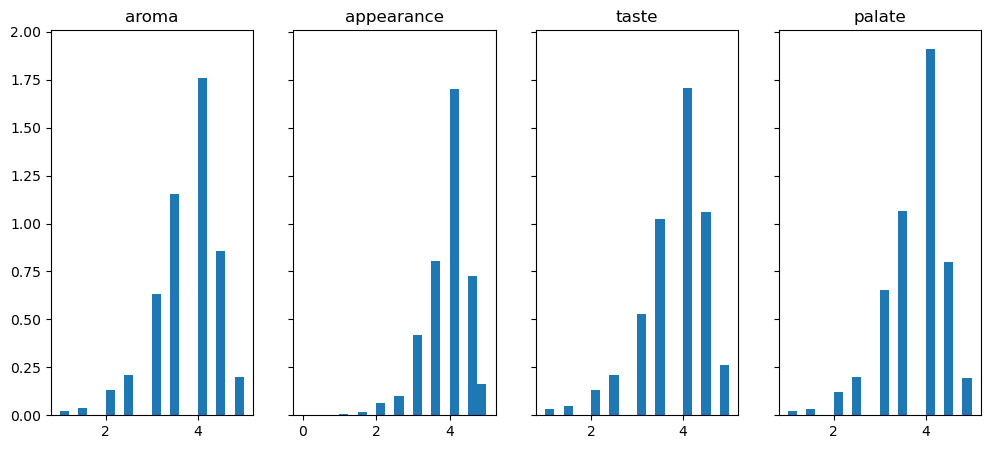

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5), sharey=True)  
# sharey=True makes the graphs SHARE the same value count
df_plot=df[['aroma', 'appearance', 'taste', 'palate']]

for i, col in enumerate(df_plot.columns):
    axes[i].hist(df_plot[col], bins=20, density=True)
    axes[i].set_title(col)
plt.show()

##### On a first glimpse, Palate has received the most 4 and above ratings.
##### Aroma and Taste are the factors that received the most 3 and below ratings.

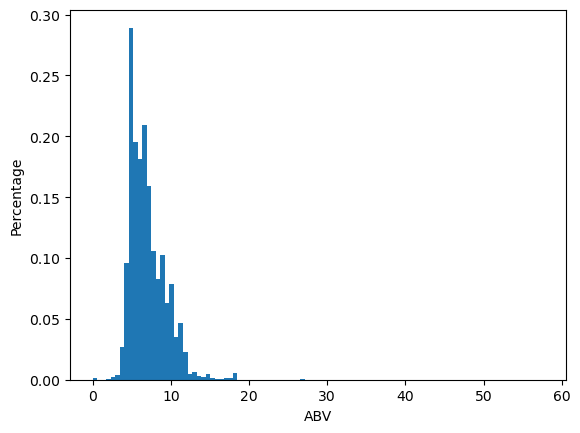

In [27]:
df.abv.plot(kind='hist', y='data', bins=100, density=True)
plt.ylabel('Percentage')
plt.xlabel('ABV')
plt.show()

> Grouping the breweries

In [28]:
df_brewery = df.groupby(['brewery name'])['brewery name'].count()

In [29]:
brewery_count = pd.DataFrame(df["brewery name"].value_counts())

In [30]:
brewery_count = brewery_count.reset_index()
brewery_count.columns = ["brewery name", "reviews"]

In [31]:
display(brewery_count.head(50))
display(brewery_count.tail(50))

,brewery name,reviews
0,Boston Beer Company (Samuel Adams),39444
1,Dogfish Head Brewery,33839
2,Stone Brewing Co.,33066
3,Sierra Nevada Brewing Co.,28751
4,"Bell's Brewery, Inc.",25191
5,Rogue Ales,24083
6,Founders Brewing Company,20004
7,Victory Brewing Company,19479
8,Lagunitas Brewing Company,16837
9,Avery Brewing Company,16107


,brewery name,reviews
5692,Reijin Shuzo K.k.,1
5693,"Swan On The Green, The",1
5694,Inderøy Gårdsbryggeri,1
5695,Rhoenbrauerei Dittmar,1
5696,Yuiga Doxon Ji Beer,1
5697,"Os 3 Cervejeiros, Lda.",1
5698,Barefoot Brewery,1
5699,Peak Brewing Company,1
5700,Diamond Beer Brewing Company,1
5701,Martin Olsson Handels AB,1


> Grouping the beer styles

In [32]:
df_beer_style = df.groupby(['beer style'])['beer style'].count()
beer_style_count = pd.DataFrame(df["beer style"].value_counts())
beer_style_count = beer_style_count.reset_index()
beer_style_count.columns = ["beer style", "count"]

In [33]:
display(beer_style_count.head(50))
display(beer_style_count.tail(50))


,beer style,count
0,American IPA,117584
1,American Double / Imperial IPA,85977
2,American Pale Ale (APA),63469
3,Russian Imperial Stout,54129
4,American Double / Imperial Stout,50705
5,American Porter,50477
6,American Amber / Red Ale,45751
7,Belgian Strong Dark Ale,37743
8,Fruit / Vegetable Beer,33861
9,American Strong Ale,31945


,beer style,count
54,American Amber / Red Lager,9311
55,Scottish Ale,9133
56,American Pale Lager,9099
57,Vienna Lager,8952
58,English Bitter,8787
59,Kölsch,8442
60,Munich Dunkel Lager,7941
61,Irish Red Ale,7877
62,Munich Helles Lager,7869
63,Altbier,7741


> <b>Grouping the beer styles and overall average rating

In [34]:
beer_style_ratings=df.groupby('beer style').aggregate({'beer style':'count','overall':'mean'})


In [35]:
df2 = beer_style_ratings.sort_values(['overall'],
              ascending = [False])

In [36]:
display(df2.head(50))
display(df2.tail(50))

,beer style,overall
beer style,,
American Wild Ale,17794,4.093262
Gueuze,6009,4.086287
Quadrupel (Quad),18086,4.071630
Lambic - Unblended,1114,4.048923
American Double / Imperial Stout,50705,4.029820
Russian Imperial Stout,54129,4.023084
Weizenbock,9412,4.007969
American Double / Imperial IPA,85977,3.998017
Flanders Red Ale,6664,3.992722


,beer style,overall
beer style,,
Czech Pilsener,12740,3.794662
Rauchbier,3962,3.794548
Kölsch,8442,3.789623
English Bitter,8787,3.784056
English Strong Ale,4799,3.783288
Irish Dry Stout,12595,3.782334
American Amber / Red Ale,45751,3.781010
Scottish Ale,9133,3.777948
Witbier,30140,3.776891


In [37]:
df2=df2.rename(columns={'beer style':'reviews'})

df2=df2.reset_index()

In [65]:
df_kolsch=df2[df2['beer style'].str.contains("Kölsch")]

In [66]:
df_kolsch

,beer style,reviews,overall
56,Kölsch,8442,3.789623


In [67]:
df_Alt=df2[df2['beer style'].str.contains("Alt")]

In [68]:
df_Alt

,beer style,reviews,overall
51,Altbier,7741,3.824054


In [69]:
df_beer_kolsch=df[df['beer style'].str.contains("Kölsch")]

In [73]:
df_beer_kolsch['beer name'].unique()

array(['Gosch', 'Kölsch', 'Claire De Lune', 'Old Orange Street Fair',
       'Verich Gold', 'Celtic Mater', 'Kolsch', 'J.T. Memorial Kolsch',
       "'Sconnie Tall Blonde Ale", 'Richmodis Koelsch',
       'The Cowboy Kolsch', 'Firkin - Twig & Berries Kolsch',
       'Kolsch Ale', 'Kingpin Kolsch', 'Colón Light', 'Regatta Golden',
       'Pröjekt H50 Kölsch', 'Vienna Gold', 'Founders Kölsch',
       'Col. Kolch', 'Wing Dam Wheat', 'Kölsch Ale',
       'Mornington Peninsula Sorachi Kolsch',
       "Brett's Organic Kolsch (Brewer's Reserve)", 'Karnival Kolsch',
       'Tenaya Creek Kolsch', 'Ölsch', "Kupper's",
       'Indian River Shoal Draft', 'Jamesport Kolsch',
       'Sierra Nevada Kölsch Style Ale', 'Cooper\x92s Gold Kolsch',
       "Hale's Kölsch", 'Volkbier', 'Columbine Kolsch',
       'Sky Blue Golden Ale', 'Sunbru Kölsch-Style Ale',
       'Mike Duggan #04 Kölsch', 'Melon Head', 'Colorado Kolsch',
       'Dundee Kolsch Style Ale', 'Obispado', 'Capitol Kolsch',
       'Edge City 

> Filtering on ALE beers

In [38]:
df_ales=df2[df2['beer style'].str.contains("Ale")]

In [39]:
display(df_ales)
display(df_ales.shape)

,beer style,reviews,overall
0,American Wild Ale,17794,4.093262
8,Flanders Red Ale,6664,3.992722
14,Saison / Farmhouse Ale,31480,3.962564
19,American Black Ale,11446,3.934475
24,Belgian Strong Dark Ale,37743,3.913322
27,Old Ale,14703,3.899000
30,Belgian Strong Pale Ale,31490,3.895602
35,Scotch Ale / Wee Heavy,17441,3.874262
36,American Strong Ale,31945,3.873501
41,American Brown Ale,25297,3.857434


(28, 3)

In [40]:
print('The total of Ales is:', df_ales['reviews'].sum())
print('The percentage of Ales is', round(50667400/1586614, 2) )

The total of Ales is: 506674
The percentage of Ales is 31.93


> Doing the same with IPA

In [41]:
df_IPA=df2[df2['beer style'].str.contains("IPA")]

In [42]:
print('The total of IPAs is:', df_IPA['reviews'].sum())
print('The percentage of IPAs is', round(23199100/1586614, 2) )

The total of IPAs is: 231991
The percentage of IPAs is 14.62


In [43]:
display(df_IPA)
display(df_IPA.shape)

,beer style,reviews,overall
7,American Double / Imperial IPA,85977,3.998017
12,American IPA,117584,3.965221
15,Belgian IPA,12471,3.958704
69,English India Pale Ale (IPA),15959,3.732471


(4, 3)

> And with APAs

In [44]:
df_APA=df2[df2['beer style'].str.contains("APA")]

In [45]:
print('The total of APAs is:', df_APA['reviews'].sum())
print('The percentage of APAs is', round(6346900/1586614, 2) )

The total of APAs is: 63469
The percentage of APAs is 4.0


In [46]:
display(df_APA)
display(df_APA.shape)

,beer style,reviews,overall
43,American Pale Ale (APA),63469,3.852306


(1, 3)

> As IPA is an Ale, as is APA, I am grouping all of them into ALES 

In [47]:
df_ALES=df2[df2['beer style'].str.contains("(APA)|(Ale)|(IPA)")]

C:\Users\sabba\AppData\Local\Temp\ipykernel_29640\228594990.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ALES=df2[df2['beer style'].str.contains("(APA)|(Ale)|(IPA)")]


In [48]:
df_ALES

,beer style,reviews,overall
0,American Wild Ale,17794,4.093262
7,American Double / Imperial IPA,85977,3.998017
8,Flanders Red Ale,6664,3.992722
12,American IPA,117584,3.965221
14,Saison / Farmhouse Ale,31480,3.962564
15,Belgian IPA,12471,3.958704
19,American Black Ale,11446,3.934475
24,Belgian Strong Dark Ale,37743,3.913322
27,Old Ale,14703,3.899000
30,Belgian Strong Pale Ale,31490,3.895602


> Grouping beer name

In [49]:
beer_name_ratings=df.groupby('beer name').aggregate({'beer name':'count','overall':'mean'})

In [52]:
beer_name_ratings

,beer name,overall
beer name,,
! (Old Ale),1,4.000000
"""100""",5,4.000000
"""100"" Pale Ale",1,4.000000
"""12"" Belgian Golden Strong Ale",2,4.000000
"""33"" Export",3,3.000000
...,...,...
Žamberecký Kanec Imperial Stout,2,3.750000
Ω-naught (Omeganaught),3,4.166667
“Chewy” Double IPA,1,2.500000


In [55]:
#beer_name_ratings=beer_name_ratings.sort_values('count')
df_beername=beer_name_ratings.rename(columns={'beer name':'count'})



In [56]:
df_beername=df_beername.reset_index()

In [63]:
df_beername=df_beername.sort_values('count', ascending=False)

In [64]:
display(df_beername.head(50))
display(df_beername.tail(50))

,beer name,count,overall
900,90 Minute IPA,3290,4.145745
26109,India Pale Ale,3130,3.842812
36860,Old Rasputin Russian Imperial Stout,3111,4.174221
45802,Sierra Nevada Celebration Ale,3000,4.168667
52567,Two Hearted Ale,2728,4.329729
3133,Arrogant Bastard Ale,2704,4.078402
48629,Stone Ruination IPA,2704,4.161612
45818,Sierra Nevada Pale Ale,2587,4.245845
48586,Stone IPA (India Pale Ale),2575,4.257670
39641,Pliny The Elder,2527,4.590028


,beer name,count,overall
44181,Santa Costeleta Belgian Style Tripel,1,3.5
44533,Scherdel Lager,1,3.0
44212,Santa's Little Helper 2009 Barrel Aged,1,4.0
44221,Santa's Pet Monkey,1,4.0
44363,Sarrasin,1,3.5
44361,Sarmat Svitle,1,3.0
44348,Saratoga Pale Ale,1,3.0
44360,Sarmat Pshenychne VIP,1,4.0
44359,Sarmat Premium,1,3.0
44356,Sarmat Lehke,1,2.0


In [96]:
df_beername.loc[(df_beername['count']>1000) & (df_beername['overall']>4)]

,beer name,count,overall
900,90 Minute IPA,3290,4.145745
36860,Old Rasputin Russian Imperial Stout,3111,4.174221
45802,Sierra Nevada Celebration Ale,3000,4.168667
52567,Two Hearted Ale,2728,4.329729
3133,Arrogant Bastard Ale,2704,4.078402
...,...,...,...
25205,Houblon Chouffe Dobbelen IPA Tripel,1015,4.177833
38532,Paulaner Oktoberfest-Märzen,1013,4.040474
14439,Dark Lord Imperial Stout,1011,4.146390
5897,Big Bear Black Stout,1003,4.182453


In [82]:
df_beer_sorted=df['beer name'].sort_values(ascending=True)

In [83]:
df_beer_sorted=pd.DataFrame(df_beer_sorted).reset_index()

In [166]:
df_beer_sorted[df_beer_sorted['beer name'].str.startswith('Caldera Pale')]

,index,beer name
285245,198,Caldera Pale Ale
285246,197,Caldera Pale Ale
285247,199,Caldera Pale Ale
285248,193,Caldera Pale Ale
285249,196,Caldera Pale Ale
...,...,...
285403,145,Caldera Pale Ale
285404,146,Caldera Pale Ale
285405,147,Caldera Pale Ale
285406,148,Caldera Pale Ale


### Getting new data

In [112]:
df_ibu=pd.read_csv('Beers.csv')

In [113]:
df_ibu

,Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces
0,Pub Beer,1436,0.050,NaN,409,American Pale Lager,12.0
1,Devil's Cup,2265,0.066,NaN,178,American Pale Ale (APA),12.0
2,Rise of the Phoenix,2264,0.071,NaN,178,American IPA,12.0
3,Sinister,2263,0.090,NaN,178,American Double / Imperial IPA,12.0
4,Sex and Candy,2262,0.075,NaN,178,American IPA,12.0
...,...,...,...,...,...,...,...
2405,Belgorado,928,0.067,45.0,425,Belgian IPA,12.0
2406,Rail Yard Ale,807,0.052,NaN,425,American Amber / Red Ale,12.0
2407,B3K Black Lager,620,0.055,NaN,425,Schwarzbier,12.0
2408,Silverback Pale Ale,145,0.055,40.0,425,American Pale Ale (APA),12.0


In [114]:
df_ibu.IBU.isna().sum()

1005

In [115]:
df_ibu=df_ibu[df_ibu['IBU'].isna()==False]

In [116]:
df_ibu[df_ibu['beer name'].str.startswith('Caldera')]

,Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces
14,Bitter Bitch,1979,0.061,60.0,178,American Pale Ale (APA),12.0
21,Lower De Boom,1036,0.099,92.0,369,American Barleywine,8.4
22,Fireside Chat,1024,0.079,45.0,369,Winter Warmer,12.0
24,Bitter American,876,0.044,42.0,369,American Pale Ale (APA),12.0
25,Hell or High Watermelon Wheat (2009),802,0.049,17.0,369,Fruit / Vegetable Beer,12.0
...,...,...,...,...,...,...,...
2398,Lights Out Vanilla Cream Extra Stout,1513,0.077,30.0,200,American Double / Imperial IPA,12.0
2399,Worthy IPA (2013),1512,0.069,69.0,200,American IPA,12.0
2400,Worthy Pale,1511,0.060,50.0,200,American Pale Ale (APA),12.0
2405,Belgorado,928,0.067,45.0,425,Belgian IPA,12.0


In [164]:
df_ibu[df_ibu['beer name'].str.startswith('Caldera')]

,IBU,beer name
506,55.0,Caldera Pale Ale
509,94.0,Caldera IPA (2009)
510,94.0,Caldera IPA (2007)
511,55.0,Caldera Pale Ale (2010)
512,55.0,Caldera Pale Ale (2009)
513,55.0,Caldera Pale Ale (2005)
514,55.0,Caldera Pale Ale (2007)
515,55.0,Caldera Pale Ale (2011)
517,94.0,Caldera IPA


In [130]:
df_ibu=df_ibu[['Name', 'IBU']]

In [144]:
df_ibu['beer name']=df_ibu['Name']

C:\Users\sabba\AppData\Local\Temp\ipykernel_29640\2626996072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibu['beer name']=df_ibu['Name']


In [146]:
df_ibu=df_ibu.drop(['Name'], axis=1)

In [163]:
df_ibu

,IBU,beer name
14,60.0,Bitter Bitch
21,92.0,Lower De Boom
22,45.0,Fireside Chat
24,42.0,Bitter American
25,17.0,Hell or High Watermelon Wheat (2009)
...,...,...
2398,30.0,Lights Out Vanilla Cream Extra Stout
2399,69.0,Worthy IPA (2013)
2400,50.0,Worthy Pale
2405,45.0,Belgorado


In [148]:
df_merged=pd.merge(df, df_ibu, on="beer name")

In [149]:
df_merged

,brewery id,brewery name,beer id,beer name,beer style,user id,aroma,appearance,palate,taste,abv,overall,IBU
0,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),NJpadreFan,3.5,3.5,4.0,4.0,5.5,4.0,55.0
1,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),vacax,3.0,3.5,3.5,2.5,5.5,2.5,55.0
2,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),d0ggnate,3.5,4.0,4.0,3.5,5.5,4.0,55.0
3,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),babyhobbes,3.5,4.0,3.5,4.0,5.5,4.5,55.0
4,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),mdagnew,3.5,4.0,4.0,4.0,5.5,4.5,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74168,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,TenHornsProud,4.0,4.0,4.0,4.0,6.5,4.0,23.0
74169,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,twiggamortis420,3.5,3.5,4.5,3.5,6.5,3.5,23.0
74170,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,Mora2000,3.5,4.0,4.0,3.5,6.5,4.0,23.0
74171,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,HopsKeepDroppin,4.0,4.5,4.5,4.0,6.5,4.5,23.0


In [170]:
df_merged.IBU.value_counts()

65.0    13694
18.0     6058
37.0     5688
35.0     3993
20.0     3959
        ...  
46.0        2
91.0        2
74.0        1
51.0        1
38.0        1
Name: IBU, Length: 80, dtype: int64

In [181]:
df_merged

,brewery id,brewery name,beer id,beer name,beer style,user id,aroma,appearance,palate,taste,abv,overall,IBU
0,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),NJpadreFan,3.5,3.5,4.0,4.0,5.5,4.0,55.0
1,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),vacax,3.0,3.5,3.5,2.5,5.5,2.5,55.0
2,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),d0ggnate,3.5,4.0,4.0,3.5,5.5,4.0,55.0
3,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),babyhobbes,3.5,4.0,3.5,4.0,5.5,4.5,55.0
4,1075,Caldera Brewing Company,25414,Caldera Pale Ale,American Pale Ale (APA),mdagnew,3.5,4.0,4.0,4.0,5.5,4.5,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74168,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,TenHornsProud,4.0,4.0,4.0,4.0,6.5,4.0,23.0
74169,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,twiggamortis420,3.5,3.5,4.5,3.5,6.5,3.5,23.0
74170,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,Mora2000,3.5,4.0,4.0,3.5,6.5,4.0,23.0
74171,16759,Southern Star Brewing Company,76047,Le Mort Vivant,Bière de Garde,HopsKeepDroppin,4.0,4.5,4.5,4.0,6.5,4.5,23.0


> Doing Hypothesis Testing on the beer`s caracheteristics

In [ ]:
import scipy.stats
from scipy.stats import ttest_1samp

> Checking correlations with Overall Ratings

In [97]:
df_num=df.select_dtypes(include=np.number)

In [99]:
numerical_df_corr = df_num.corr()['overall'][:-1] 
sorted_corr = numerical_df_corr.sort_values(ascending=False)
print("Correlation coefficients with Overall Ratings (in descending order):\n{}".format(sorted_corr))


Correlation coefficients with Overall Ratings (in descending order):
taste         0.789813
palate        0.701910
aroma         0.616008
appearance    0.501726
abv           0.137368
beer id       0.003793
brewery id   -0.009333
Name: overall, dtype: float64


> Building a model to predict the Overall reviews ratings based on the beer´s caracheristics reviews.

In [150]:
df_num2=df_merged.select_dtypes(include=np.number)

In [151]:
df_num2=df_num2.drop(['brewery id', 'beer id'], axis=1)

In [162]:
df_num2.head(50)

,aroma,appearance,palate,taste,abv,overall,IBU
0,3.5,3.5,4.0,4.0,5.5,4.0,55.0
1,3.0,3.5,3.5,2.5,5.5,2.5,55.0
2,3.5,4.0,4.0,3.5,5.5,4.0,55.0
3,3.5,4.0,3.5,4.0,5.5,4.5,55.0
4,3.5,4.0,4.0,4.0,5.5,4.5,55.0
5,3.5,4.5,4.0,4.0,5.5,4.0,55.0
6,3.5,4.0,4.0,4.0,5.5,4.0,55.0
7,4.0,3.5,3.5,4.0,5.5,3.5,55.0
8,4.0,4.0,3.5,3.5,5.5,3.5,55.0
9,4.0,4.5,4.5,4.0,5.5,5.0,55.0


In [154]:
X=df_num2.drop(['overall'], axis=1)
y=df_num2['overall']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
transformer = MinMaxScaler().fit(X_train) 

X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [157]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [158]:
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [159]:
def train_and_test_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(model.__class__.__name__, 'score is:', r2)

In [160]:
models = [linear_model.LinearRegression(),KNeighborsRegressor(),MLPRegressor()]

train_and_test_models(models, X_train, y_train, X_test, y_test)

LinearRegression score is: 0.6278012697393822
KNeighborsRegressor score is: 0.5945926250728906
MLPRegressor score is: 0.6357919365773468
